## Investigating 1st PC and WCS scores

### Conditions description:
<ul>
    <li>C1 = low interference, easy search</li>
    <li>C2 = low interference, hard search</li>
    <li>C3 = high interference, easy search</li>
    <li>C4 = high interference, hard search</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm

import nilearn
from nilearn import datasets
from nilearn import surface
from nilearn import plotting 
from nilearn.image import concat_imgs, mean_img
from mne.stats import fdr_correction

from visbrain.gui import Brain
from visbrain.objects import SourceObj, BrainObj, ColorbarObj, SceneObj
from visbrain.io import download_file, read_stc



/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load data and compute mean across conditions


In [2]:
# Paths to access files
home_dir = "DistractWM/"
c1_pc_path = "/graph_metrics/pc_cond1_space.npy"
c2_pc_path = "/graph_metrics/pc_cond2_space.npy"
c3_pc_path = "/graph_metrics/pc_cond3_space.npy"
c4_pc_path = "/graph_metrics/pc_cond4_space.npy"

c1_wcs_path = "/graph_metrics/wcs_cond1_space.npy"
c2_wcs_path = "/graph_metrics/wcs_cond2_space.npy"
c3_wcs_path = "/graph_metrics/wcs_cond3_space.npy"
c4_wcs_path = "/graph_metrics/wcs_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

columns = ['S-102', 'S-103', 'S-104', 'S-105', 'S-106', 
          'S-107', 'S-108', 'S-109', 'S-110', 'S-112',
          'S-114', 'S-115', 'S-116', 'S-117', 'S-118',
          'S-119', 'S-120', 'S-121', 'S-122', 'S-123',
          'S-124', 'S-125', 'S-126', 'S-129', 'S-130',
          'S-131', 'S-132']

# Creat psudo-empty dataframe
c1_pc_df = pd.DataFrame()
c2_pc_df = pd.DataFrame()
c3_pc_df = pd.DataFrame()
c4_pc_df = pd.DataFrame()

c1_wcs_df = pd.DataFrame()
c2_wcs_df = pd.DataFrame()
c3_wcs_df = pd.DataFrame()
c4_wcs_df = pd.DataFrame()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    """Omitting participant 103 because Nan input"""
    if(not((num == 103) or (num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_pc_path1 = home_dir + name + c1_pc_path
        full_pc_path2 = home_dir + name + c2_pc_path
        full_pc_path3 = home_dir + name + c3_pc_path
        full_pc_path4 = home_dir + name + c4_pc_path
        
        full_wcs_path1 = home_dir + name + c1_wcs_path
        full_wcs_path2 = home_dir + name + c2_wcs_path
        full_wcs_path3 = home_dir + name + c3_wcs_path
        full_wcs_path4 = home_dir + name + c4_wcs_path
        
        # Loading data     
        pc_c1 = np.load(full_pc_path1) 
        pc_c2 = np.load(full_pc_path2) 
        pc_c3 = np.load(full_pc_path3) 
        pc_c4 = np.load(full_pc_path4) 
        
        wcs_c1 = np.load(full_wcs_path1) 
        wcs_c2 = np.load(full_wcs_path2) 
        wcs_c3 = np.load(full_wcs_path3) 
        wcs_c4 = np.load(full_wcs_path4) 
        
        c1_pc_mean = pc_c1[0, :] #np.mean(pc_c1, axis=0)
        c2_pc_mean = pc_c2[0, :] #np.mean(pc_c2, axis=0)
        c3_pc_mean = pc_c3[0, :] #np.mean(pc_c3, axis=0)
        c4_pc_mean = pc_c4[0, :] #np.mean(pc_c4, axis=0)
        
        c1_wcs_mean = wcs_c1[0, :] #np.mean(wcs_c1, axis=0)
        c2_wcs_mean = wcs_c2[0, :] #np.mean(wcs_c2, axis=0)
        c3_wcs_mean = wcs_c3[0, :] #np.mean(wcs_c3, axis=0)
        c4_wcs_mean = wcs_c4[0, :] #np.mean(wcs_c4, axis=0)
        
        # Appending data to df
        c1_pc_df[name] = c1_pc_mean
        c2_pc_df[name] = c2_pc_mean
        c3_pc_df[name] = c3_pc_mean
        c4_pc_df[name] = c4_pc_mean
        
        c1_wcs_df[name] = c1_wcs_mean
        c2_wcs_df[name] = c2_wcs_mean
        c3_wcs_df[name] = c3_wcs_mean
        c4_wcs_df[name] = c4_wcs_mean

             
print("c1_pc_df shape: " + str(c1_pc_df.shape))
print("c2_pc_df shape: " + str(c2_pc_df.shape))
print("c3_pc_df shape: " + str(c3_pc_df.shape))
print("c4_pc_df shape: " + str(c4_pc_df.shape))

print("c1_wcs_df shape: " + str(c1_wcs_df.shape))
print("c2_wcs_df shape: " + str(c2_wcs_df.shape))
print("c3_wcs_df shape: " + str(c3_wcs_df.shape))
print("c4_wcs_df shape: " + str(c4_wcs_df.shape))

c1_pc_df shape: (400, 26)
c2_pc_df shape: (400, 26)
c3_pc_df shape: (400, 26)
c4_pc_df shape: (400, 26)
c1_wcs_df shape: (400, 26)
c2_wcs_df shape: (400, 26)
c3_wcs_df shape: (400, 26)
c4_wcs_df shape: (400, 26)


In [3]:
# Sample of created dataframes
c1_pc_df.head(10)

,sub-102,sub-104,sub-105,sub-106,sub-107,sub-108,sub-109,sub-110,sub-112,sub-114,...,sub-121,sub-122,sub-123,sub-124,sub-125,sub-126,sub-129,sub-130,sub-131,sub-132
0,0.079231,0.000000,0.636253,0.124468,0.553505,0.496839,0.499007,0.257250,0.226316,0.312394,...,0.000000,0.000000,0.671996,0.149731,0.103255,0.000000,0.615968,0.210600,0.160680,0.143700
1,0.066906,0.178491,0.525747,0.069275,0.310011,0.386390,0.403044,0.145963,0.000000,0.665521,...,0.000000,0.365053,0.377947,0.043272,0.000000,0.000000,0.512645,0.062177,0.098123,0.030831
2,0.086963,0.000000,0.085957,0.274693,0.173926,0.000000,0.271800,0.117588,0.232108,0.144397,...,0.000000,0.446586,0.501470,0.034346,0.499298,0.000000,0.190670,0.226014,0.290076,0.000000
3,0.090054,0.129650,0.186969,0.540893,0.272968,0.083459,0.000000,0.170138,0.509700,0.531216,...,0.000000,0.372456,0.658672,0.051729,0.263752,0.000000,0.000000,0.127779,0.186678,0.172957
4,0.070997,0.000000,0.000000,0.190723,0.243795,0.000000,0.000000,0.074553,0.000000,0.141283,...,0.000000,0.000000,0.529345,0.000000,0.000000,0.000000,0.306929,0.000000,0.128083,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.500755,0.000000,0.000000,0.000000,0.234072,0.312735,...,0.000000,0.000000,0.653216,0.000000,0.517609,0.000000,0.615147,0.158622,0.000000,0.234029
6,0.431090,0.485698,0.191655,0.526041,0.298491,0.493222,0.192453,0.000000,0.114091,0.000000,...,0.000000,0.000000,0.518713,0.000000,0.486115,0.000000,0.210307,0.206197,0.130664,0.000000
7,0.196932,0.320214,0.456981,0.382256,0.673598,0.295655,0.250437,0.181963,0.743974,0.714017,...,0.665207,0.000000,0.454852,0.000000,0.292196,0.710043,0.596052,0.356950,0.382033,0.441718
8,0.000000,0.133635,0.000000,0.257313,0.000000,0.071885,0.499908,0.000000,0.000000,0.414863,...,0.000000,0.000000,0.630897,0.000000,0.000000,0.000000,0.263568,0.052097,0.000000,0.000000
9,0.000000,0.198987,0.429985,0.521894,0.652081,0.176056,0.414525,0.042166,0.657556,0.507192,...,0.000000,0.000000,0.491175,0.000000,0.272286,0.357281,0.719548,0.328551,0.000000,0.080203


In [4]:
# Computing mean across participants for each condition
c1_total_pc_mean = np.array(c1_pc_df.mean(axis=1))
c2_total_pc_mean = np.array(c2_pc_df.mean(axis=1))
c3_total_pc_mean = np.array(c3_pc_df.mean(axis=1))
c4_total_pc_mean = np.array(c4_pc_df.mean(axis=1))

print("c1_total_pc_mean shape: " + str(c1_total_pc_mean.shape))
print("c2_total_pc_mean shape: " + str(c2_total_pc_mean.shape))
print("c3_total_pc_mean shape: " + str(c3_total_pc_mean.shape))
print("c4_total_pc_mean shape: " + str(c4_total_pc_mean.shape))

c1_total_wcs_mean = np.array(c1_wcs_df.mean(axis=1))
c2_total_wcs_mean = np.array(c2_wcs_df.mean(axis=1))
c3_total_wcs_mean = np.array(c3_wcs_df.mean(axis=1))
c4_total_wcs_mean = np.array(c4_wcs_df.mean(axis=1))

print("c1_total_wcs_mean shape: " + str(c1_total_wcs_mean.shape))
print("c2_total_wcs_mean shape: " + str(c2_total_wcs_mean.shape))
print("c3_total_wcs_mean shape: " + str(c3_total_wcs_mean.shape))
print("c4_total_wcs_mean shape: " + str(c4_total_wcs_mean.shape))

c1_total_pc_mean shape: (400,)
c2_total_pc_mean shape: (400,)
c3_total_pc_mean shape: (400,)
c4_total_pc_mean shape: (400,)
c1_total_wcs_mean shape: (400,)
c2_total_wcs_mean shape: (400,)
c3_total_wcs_mean shape: (400,)
c4_total_wcs_mean shape: (400,)


## Compute differences between conditions

In [5]:
# Differences between pc
PC_C4_C1 = np.array(c4_total_pc_mean - c1_total_pc_mean)
PC_C4_C2 = np.array(c4_total_pc_mean - c2_total_pc_mean)
PC_C4_C3 = np.array(c4_total_pc_mean - c3_total_pc_mean)
PC_C3_C1 = np.array(c3_total_pc_mean - c1_total_pc_mean)
PC_C3_C2 = np.array(c3_total_pc_mean - c2_total_pc_mean)
PC_C2_C1 = np.array(c2_total_pc_mean - c1_total_pc_mean)

print("PC_C4_C1 shape: " + str(PC_C4_C1.shape))
print("PC_C4_C2 shape: " + str(PC_C4_C2.shape))
print("PC_C4_C3 shape: " + str(PC_C4_C3.shape))
print("PC_C3_C1 shape: " + str(PC_C3_C1.shape))
print("PC_C3_C2 shape: " + str(PC_C3_C2.shape))
print("PC_C2_C1 shape: " + str(PC_C3_C2.shape))

WCS_C4_C1 = np.array(c4_total_wcs_mean - c1_total_wcs_mean)
WCS_C4_C2 = np.array(c4_total_wcs_mean - c2_total_wcs_mean)
WCS_C4_C3 = np.array(c4_total_wcs_mean - c3_total_wcs_mean)
WCS_C3_C1 = np.array(c3_total_wcs_mean - c1_total_wcs_mean)
WCS_C3_C2 = np.array(c3_total_wcs_mean - c2_total_wcs_mean)
WCS_C2_C1 = np.array(c2_total_wcs_mean - c1_total_wcs_mean)

print("WCS_C4_C1 shape: " + str(WCS_C4_C1.shape))
print("WCS_C4_C2 shape: " + str(WCS_C4_C2.shape))
print("WCS_C4_C3 shape: " + str(WCS_C4_C3.shape))
print("WCS_C3_C1 shape: " + str(WCS_C3_C1.shape))
print("WCS_C3_C2 shape: " + str(WCS_C3_C2.shape))
print("WCS_C2_C1 shape: " + str(WCS_C3_C2.shape))


PC_C4_C1 shape: (400,)
PC_C4_C2 shape: (400,)
PC_C4_C3 shape: (400,)
PC_C3_C1 shape: (400,)
PC_C3_C2 shape: (400,)
PC_C2_C1 shape: (400,)
WCS_C4_C1 shape: (400,)
WCS_C4_C2 shape: (400,)
WCS_C4_C3 shape: (400,)
WCS_C3_C1 shape: (400,)
WCS_C3_C2 shape: (400,)
WCS_C2_C1 shape: (400,)


## Run t-tests

In [6]:
from scipy.stats import ttest_rel, normaltest

# Extract labels 
par_data = pd.read_csv("Parcellations/MNI/Centroid_coordinates/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv")
labels = np.array(par_data["ROI Name"]).reshape(400, 1)

def run_ttest_and_fdr(data1, data2, name2save):
    
    data1 = np.array(data1)
    data2 = np.array(data2)

    results = np.zeros((400, 5))

    for x in range(400):
        
         # Calculate paired-sample two-tailed t-test
        results[x, 0], results[x, 1] = ttest_rel(data1[x, :], data2[x, :], nan_policy="omit", alternative="two-sided")
        
        if(0.05 > results[x, 1]):
            results[x, 2] = True
        else:
            results[x, 2] = False    
    
    # Calculate false discovery rate (fdr) Benjamini/Hochberg
    results[:, 4], results[:, 3] = fdr_correction(results[:, 1], alpha=0.05, method='indep')
    
    # Append results to DataFrame
    results_df = pd.DataFrame(results, columns=["t_statistic", "p_val", "rej_null(x<0.05)", "corrected_p_val", "fdr_rej_null(x<0.05)"])
    results_df["label"] = labels      
    path = str("GitHub/Summer_2021_fMRI/t_tests_csv/1st_score/t_test_PC&WCS_DifferencesBetweenConditions" + name2save + ".csv")
    results_df.to_csv(path, sep='\t')
    
    return results_df

# Sample of t-test results
PC_tt_C1_C2 = run_ttest_and_fdr(c1_pc_df, c2_pc_df, "PC_tt_C1_C2")
PC_tt_C1_C2.head(10)

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
0,-0.272241,0.787672,0.0,0.993909,0.0,7Networks_LH_Vis_1
1,0.068711,0.945766,0.0,0.997548,0.0,7Networks_LH_Vis_2
2,-0.155484,0.877688,0.0,0.997548,0.0,7Networks_LH_Vis_3
3,0.197784,0.844814,0.0,0.997548,0.0,7Networks_LH_Vis_4
4,-0.475562,0.638516,0.0,0.986684,0.0,7Networks_LH_Vis_5
5,0.142374,0.887926,0.0,0.997548,0.0,7Networks_LH_Vis_6
6,-0.925206,0.363704,0.0,0.986684,0.0,7Networks_LH_Vis_7
7,-0.432942,0.668769,0.0,0.986684,0.0,7Networks_LH_Vis_8
8,-0.057612,0.954515,0.0,0.997548,0.0,7Networks_LH_Vis_9
9,0.242354,0.810483,0.0,0.996870,0.0,7Networks_LH_Vis_10


In [7]:
PC_tt_C1_C2 = run_ttest_and_fdr(c1_pc_df, c2_pc_df, "PC_tt_C1_C2")
PC_tt_C1_C3 = run_ttest_and_fdr(c1_pc_df, c3_pc_df, "PC_tt_C1_C3")
PC_tt_C1_C4 = run_ttest_and_fdr(c1_pc_df, c4_pc_df, "PC_tt_C1_C4")
PC_tt_C2_C3 = run_ttest_and_fdr(c2_pc_df, c3_pc_df, "PC_tt_C2_C3")
PC_tt_C2_C4 = run_ttest_and_fdr(c2_pc_df, c4_pc_df, "PC_tt_C2_C4")
PC_tt_C3_C4 = run_ttest_and_fdr(c3_pc_df, c4_pc_df, "PC_tt_C3_C4")

print("PC_tt_C1_C2 shape: " + str(PC_tt_C1_C2.shape))
print("PC_tt_C1_C3 shape: " + str(PC_tt_C1_C3.shape))
print("PC_tt_C1_C4 shape: " + str(PC_tt_C1_C4.shape))
print("PC_tt_C2_C3 shape: " + str(PC_tt_C2_C3.shape))
print("PC_tt_C2_C4 shape: " + str(PC_tt_C2_C4.shape))
print("PC_tt_C3_C4 shape: " + str(PC_tt_C3_C4.shape))

WCS_tt_C1_C2 = run_ttest_and_fdr(c1_wcs_df, c2_wcs_df, "WCS_tt_C1_C2")
WCS_tt_C1_C3 = run_ttest_and_fdr(c1_wcs_df, c3_wcs_df, "WCS_tt_C1_C3")
WCS_tt_C1_C4 = run_ttest_and_fdr(c1_wcs_df, c4_wcs_df, "WCS_tt_C1_C4")
WCS_tt_C2_C3 = run_ttest_and_fdr(c2_wcs_df, c3_wcs_df, "WCS_tt_C2_C3")
WCS_tt_C2_C4 = run_ttest_and_fdr(c2_wcs_df, c4_wcs_df, "WCS_tt_C2_C4")
WCS_tt_C3_C4 = run_ttest_and_fdr(c3_wcs_df, c4_wcs_df, "WCS_tt_C3_C4")

print("\nWCS_tt_C1_C2 shape: " + str(WCS_tt_C1_C2.shape))
print("WCS_tt_C1_C3 shape: " + str(WCS_tt_C1_C3.shape))
print("WCS_tt_C1_C4 shape: " + str(WCS_tt_C1_C4.shape))
print("WCS_tt_C2_C3 shape: " + str(WCS_tt_C2_C3.shape))
print("WCS_tt_C2_C4 shape: " + str(WCS_tt_C2_C4.shape))
print("WCS_tt_C3_C4 shape: " + str(WCS_tt_C3_C4.shape))


PC_tt_C1_C2 shape: (400, 6)
PC_tt_C1_C3 shape: (400, 6)
PC_tt_C1_C4 shape: (400, 6)
PC_tt_C2_C3 shape: (400, 6)
PC_tt_C2_C4 shape: (400, 6)
PC_tt_C3_C4 shape: (400, 6)

WCS_tt_C1_C2 shape: (400, 6)
WCS_tt_C1_C3 shape: (400, 6)
WCS_tt_C1_C4 shape: (400, 6)
WCS_tt_C2_C3 shape: (400, 6)
WCS_tt_C2_C4 shape: (400, 6)
WCS_tt_C3_C4 shape: (400, 6)


In [8]:
PC_tt_C1_C2[PC_tt_C1_C2["rej_null(x<0.05)"] == 1]


,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
10,2.140357,0.042268,1.0,0.986684,0.0,7Networks_LH_Vis_11
37,-3.377434,0.002398,1.0,0.768949,0.0,7Networks_LH_SomMot_7
55,-2.165480,0.040093,1.0,0.986684,0.0,7Networks_LH_SomMot_25
140,-2.477835,0.020328,1.0,0.986684,0.0,7Networks_LH_Cont_PFCl_7
162,-2.502738,0.019225,1.0,0.986684,0.0,7Networks_LH_Default_Par_5
173,-2.179113,0.038956,1.0,0.986684,0.0,7Networks_LH_Default_PFC_9
183,-2.129805,0.043213,1.0,0.986684,0.0,7Networks_LH_Default_PFC_19
206,2.507609,0.019015,1.0,0.986684,0.0,7Networks_RH_Vis_7
226,3.186089,0.003845,1.0,0.768949,0.0,7Networks_RH_Vis_27
246,-2.274649,0.031767,1.0,0.986684,0.0,7Networks_RH_SomMot_17


In [9]:
PC_tt_C1_C3[PC_tt_C1_C3["rej_null(x<0.05)"] == 1]


,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
0,-2.205967,0.036800,1.0,0.639994,0.0,7Networks_LH_Vis_1
34,2.434590,0.022385,1.0,0.629771,0.0,7Networks_LH_SomMot_4
44,-2.463392,0.020995,1.0,0.629771,0.0,7Networks_LH_SomMot_14
56,-2.117374,0.044350,1.0,0.663271,0.0,7Networks_LH_SomMot_26
63,-2.787270,0.010004,1.0,0.629771,0.0,7Networks_LH_SomMot_33
66,-2.096110,0.046357,1.0,0.663271,0.0,7Networks_LH_SomMot_36
71,-2.412733,0.023496,1.0,0.629771,0.0,7Networks_LH_DorsAttn_Post_4
95,-2.702964,0.012174,1.0,0.629771,0.0,7Networks_LH_SalVentAttn_TempOcc_1
99,2.128071,0.043370,1.0,0.663271,0.0,7Networks_LH_SalVentAttn_FrOperIns_4
101,-2.224916,0.035344,1.0,0.639994,0.0,7Networks_LH_SalVentAttn_FrOperIns_6


In [10]:
PC_tt_C1_C4[PC_tt_C1_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
2,-2.089918,0.046957,1.0,0.903899,0.0,7Networks_LH_Vis_3
39,2.073690,0.048561,1.0,0.903899,0.0,7Networks_LH_SomMot_9
40,3.105341,0.004681,1.0,0.468142,0.0,7Networks_LH_SomMot_10
41,2.116129,0.044465,1.0,0.903899,0.0,7Networks_LH_SomMot_11
60,-2.271631,0.031974,1.0,0.903899,0.0,7Networks_LH_SomMot_30
63,-2.151016,0.041333,1.0,0.903899,0.0,7Networks_LH_SomMot_33
69,-2.475807,0.020421,1.0,0.903899,0.0,7Networks_LH_DorsAttn_Post_2
130,-3.507763,0.001731,1.0,0.230859,0.0,7Networks_LH_Cont_Par_5
156,-2.458815,0.021210,1.0,0.903899,0.0,7Networks_LH_Default_Temp_9
167,-3.687379,0.001101,1.0,0.230859,0.0,7Networks_LH_Default_PFC_3


In [11]:
PC_tt_C2_C3[PC_tt_C2_C3["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
1,-2.136890,0.042577,1.0,0.907680,0.0,7Networks_LH_Vis_2
10,-2.070592,0.048873,1.0,0.907680,0.0,7Networks_LH_Vis_11
42,2.238483,0.034333,1.0,0.907680,0.0,7Networks_LH_SomMot_12
60,-2.420540,0.023093,1.0,0.839760,0.0,7Networks_LH_SomMot_30
71,-2.112002,0.044850,1.0,0.907680,0.0,7Networks_LH_DorsAttn_Post_4
93,-3.313226,0.002812,1.0,0.738627,0.0,7Networks_LH_SalVentAttn_ParOper_3
101,-2.803934,0.009621,1.0,0.738627,0.0,7Networks_LH_SalVentAttn_FrOperIns_6
150,-2.743548,0.011079,1.0,0.738627,0.0,7Networks_LH_Default_Temp_3
192,-2.443914,0.021926,1.0,0.839760,0.0,7Networks_LH_Default_pCunPCC_4
212,-2.091783,0.046776,1.0,0.907680,0.0,7Networks_RH_Vis_13


In [12]:
PC_tt_C2_C4[PC_tt_C2_C4["rej_null(x<0.05)"] == 1]
#This looks weird


,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
37,2.693343,0.012449,1.0,0.681684,0.0,7Networks_LH_SomMot_7
38,2.299298,0.030119,1.0,0.686242,0.0,7Networks_LH_SomMot_8
60,-2.709153,0.012001,1.0,0.681684,0.0,7Networks_LH_SomMot_30
77,2.374479,0.025563,1.0,0.681684,0.0,7Networks_LH_DorsAttn_Post_10
85,2.690974,0.012517,1.0,0.681684,0.0,7Networks_LH_DorsAttn_FEF_1
98,-3.777588,0.000875,1.0,0.333087,0.0,7Networks_LH_SalVentAttn_FrOperIns_3
105,-2.501880,0.019262,1.0,0.681684,0.0,7Networks_LH_SalVentAttn_PFCl_1
116,-2.410404,0.023957,1.0,0.681684,0.0,7Networks_LH_Limbic_OFC_4
134,2.515815,0.018668,1.0,0.681684,0.0,7Networks_LH_Cont_PFCl_1
137,-2.206048,0.036793,1.0,0.686242,0.0,7Networks_LH_Cont_PFCl_4


In [13]:
PC_tt_C3_C4[PC_tt_C3_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
85,2.116418,0.044439,1.0,0.979761,0.0,7Networks_LH_DorsAttn_FEF_1
137,-3.124115,0.004473,1.0,0.979761,0.0,7Networks_LH_Cont_PFCl_4
163,2.395274,0.024420,1.0,0.979761,0.0,7Networks_LH_Default_Par_6
168,2.228212,0.035096,1.0,0.979761,0.0,7Networks_LH_Default_PFC_4
190,-2.194545,0.037703,1.0,0.979761,0.0,7Networks_LH_Default_pCunPCC_2
298,-2.232161,0.034801,1.0,0.979761,0.0,7Networks_RH_SalVentAttn_TempOccPar_6
316,-2.503739,0.019181,1.0,0.979761,0.0,7Networks_RH_SalVentAttn_Med_7
369,2.673946,0.013019,1.0,0.979761,0.0,7Networks_RH_Default_Temp_4
373,2.817818,0.009312,1.0,0.979761,0.0,7Networks_RH_Default_Temp_8
386,-2.191667,0.037934,1.0,0.979761,0.0,7Networks_RH_Default_PFCdPFCm_9


In [14]:
WCS_tt_C1_C2[WCS_tt_C1_C2["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
0,2.489469,0.019805,1.0,0.822149,0.0,7Networks_LH_Vis_1
75,-2.074281,0.048502,1.0,0.822149,0.0,7Networks_LH_DorsAttn_Post_8
82,2.233452,0.034705,1.0,0.822149,0.0,7Networks_LH_DorsAttn_Post_15
98,-2.918013,0.007346,1.0,0.822149,0.0,7Networks_LH_SalVentAttn_FrOperIns_3
107,2.150517,0.041376,1.0,0.822149,0.0,7Networks_LH_SalVentAttn_Med_2
135,-2.415677,0.023343,1.0,0.822149,0.0,7Networks_LH_Cont_PFCl_2
136,-2.543036,0.017556,1.0,0.822149,0.0,7Networks_LH_Cont_PFCl_3
169,-2.196190,0.037572,1.0,0.822149,0.0,7Networks_LH_Default_PFC_5
170,-2.293632,0.030491,1.0,0.822149,0.0,7Networks_LH_Default_PFC_6
194,-2.093711,0.046589,1.0,0.822149,0.0,7Networks_LH_Default_pCunPCC_6


In [15]:
WCS_tt_C1_C3[WCS_tt_C1_C3["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
3,-2.357130,0.026555,1.0,0.823322,0.0,7Networks_LH_Vis_4
8,-2.210329,0.036460,1.0,0.823322,0.0,7Networks_LH_Vis_9
63,-2.889251,0.007866,1.0,0.449483,0.0,7Networks_LH_SomMot_33
80,-3.101582,0.004724,1.0,0.377948,0.0,7Networks_LH_DorsAttn_Post_13
82,2.953088,0.006757,1.0,0.449483,0.0,7Networks_LH_DorsAttn_Post_15
109,-2.118905,0.044209,1.0,0.823322,0.0,7Networks_LH_SalVentAttn_Med_4
192,2.312050,0.029298,1.0,0.823322,0.0,7Networks_LH_Default_pCunPCC_4
193,-2.348779,0.027044,1.0,0.823322,0.0,7Networks_LH_Default_pCunPCC_5
225,3.529199,0.001641,1.0,0.164072,0.0,7Networks_RH_Vis_26
250,-2.060101,0.049942,1.0,0.823322,0.0,7Networks_RH_SomMot_21


In [16]:
WCS_tt_C1_C4[WCS_tt_C1_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
60,2.520222,0.018483,1.0,0.493872,0.0,7Networks_LH_SomMot_30
70,-2.209052,0.036559,1.0,0.617488,0.0,7Networks_LH_DorsAttn_Post_3
81,2.080794,0.047853,1.0,0.660042,0.0,7Networks_LH_DorsAttn_Post_14
82,2.388607,0.024781,1.0,0.521705,0.0,7Networks_LH_DorsAttn_Post_15
83,2.397826,0.024283,1.0,0.521705,0.0,7Networks_LH_DorsAttn_Post_16
99,-2.163197,0.040287,1.0,0.617488,0.0,7Networks_LH_SalVentAttn_FrOperIns_4
109,-2.678091,0.012895,1.0,0.493872,0.0,7Networks_LH_SalVentAttn_Med_4
125,2.168437,0.039844,1.0,0.617488,0.0,7Networks_LH_Limbic_TempPole_8
139,-2.147032,0.041680,1.0,0.617488,0.0,7Networks_LH_Cont_PFCl_6
145,-2.933699,0.007077,1.0,0.493872,0.0,7Networks_LH_Cont_Cing_1


In [17]:
WCS_tt_C2_C3[WCS_tt_C2_C3["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
40,-2.966361,0.006545,1.0,0.625550,0.0,7Networks_LH_SomMot_10
77,-2.084253,0.047512,1.0,0.911360,0.0,7Networks_LH_DorsAttn_Post_10
80,-2.910651,0.007476,1.0,0.625550,0.0,7Networks_LH_DorsAttn_Post_13
135,2.891754,0.007819,1.0,0.625550,0.0,7Networks_LH_Cont_PFCl_2
172,-2.614750,0.014914,1.0,0.771106,0.0,7Networks_LH_Default_PFC_8
184,2.600090,0.015422,1.0,0.771106,0.0,7Networks_LH_Default_PFC_20
286,-2.353028,0.026794,1.0,0.911360,0.0,7Networks_RH_DorsAttn_Post_17
301,-2.190941,0.037992,1.0,0.911360,0.0,7Networks_RH_SalVentAttn_FrOperIns_1
309,2.660753,0.013421,1.0,0.771106,0.0,7Networks_RH_SalVentAttn_PFCl_1
311,-2.167058,0.039960,1.0,0.911360,0.0,7Networks_RH_SalVentAttn_Med_2


In [18]:
WCS_tt_C2_C4[WCS_tt_C2_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
19,-2.227297,0.035164,1.0,0.752339,0.0,7Networks_LH_Vis_20
41,-2.336127,0.027802,1.0,0.663357,0.0,7Networks_LH_SomMot_11
50,-2.854824,0.008534,1.0,0.538817,0.0,7Networks_LH_SomMot_20
60,2.734180,0.011324,1.0,0.538817,0.0,7Networks_LH_SomMot_30
65,-2.189991,0.038069,1.0,0.752339,0.0,7Networks_LH_SomMot_35
98,2.643104,0.013976,1.0,0.538817,0.0,7Networks_LH_SalVentAttn_FrOperIns_3
114,-2.755353,0.010779,1.0,0.538817,0.0,7Networks_LH_Limbic_OFC_2
139,-2.976988,0.006381,1.0,0.538817,0.0,7Networks_LH_Cont_PFCl_6
162,-2.706145,0.012085,1.0,0.538817,0.0,7Networks_LH_Default_Par_5
170,2.162665,0.040332,1.0,0.752339,0.0,7Networks_LH_Default_PFC_6


In [19]:
WCS_tt_C3_C4[WCS_tt_C3_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
19,-2.343465,0.027360,1.0,0.677442,0.0,7Networks_LH_Vis_20
20,2.475759,0.020423,1.0,0.677442,0.0,7Networks_LH_Vis_21
71,-2.196224,0.037569,1.0,0.834869,0.0,7Networks_LH_DorsAttn_Post_4
90,-2.345056,0.027265,1.0,0.677442,0.0,7Networks_LH_DorsAttn_PrCv_2
114,-2.563016,0.016779,1.0,0.677442,0.0,7Networks_LH_Limbic_OFC_2
162,-2.723457,0.011609,1.0,0.677442,0.0,7Networks_LH_Default_Par_5
172,2.542678,0.017570,1.0,0.677442,0.0,7Networks_LH_Default_PFC_8
184,-3.256627,0.003233,1.0,0.677442,0.0,7Networks_LH_Default_PFC_20
189,-2.339890,0.027575,1.0,0.677442,0.0,7Networks_LH_Default_pCunPCC_1
192,2.083312,0.047604,1.0,0.968821,0.0,7Networks_LH_Default_pCunPCC_4


## Plot Statistics Results

### PC (C1 - C2) (low interference, easy search - low interference, hard search)

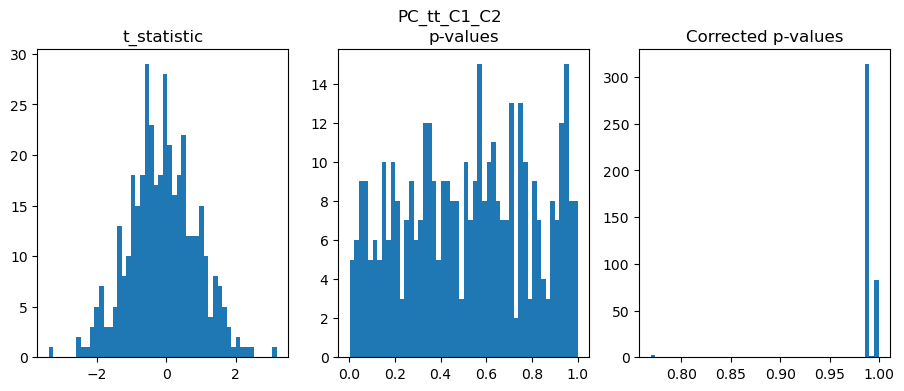

In [20]:
# Create function to plot results
def plot_stats(data, title):
    
    fig, axs = plt.subplots(1, 3, figsize=(11, 4))
    fig.suptitle(str(title))
    
    axs[0].hist(data["t_statistic"], bins=50)
    axs[0].set_title('t_statistic')
    
    axs[1].hist(data["p_val"], bins=50)
    axs[1].set_title('p-values')
    
    axs[2].hist(data["corrected_p_val"], bins=50)
    axs[2].set_title('Corrected p-values')
    
    plt.show()

plot_stats(PC_tt_C1_C2, "PC_tt_C1_C2")

### PC (C1 - C3) (low interference, easy search - high interference, easy search)

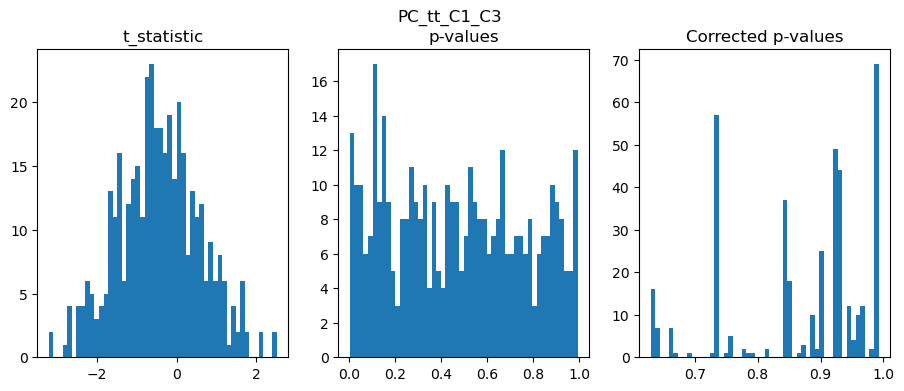

In [21]:
plot_stats(PC_tt_C1_C3, "PC_tt_C1_C3")

### PC (C1 - C4) (low interference, easy search - high interference, hard search)


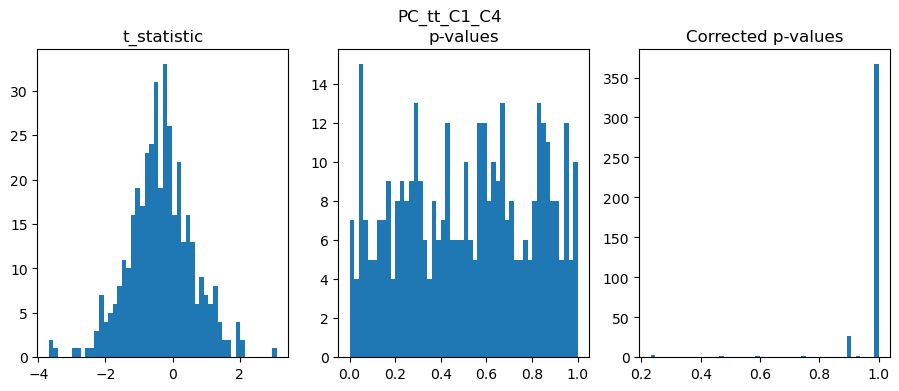

In [22]:
plot_stats(PC_tt_C1_C4, "PC_tt_C1_C4")

### PC (C2 - C3) (low interference, hard search - high interference, easy search)

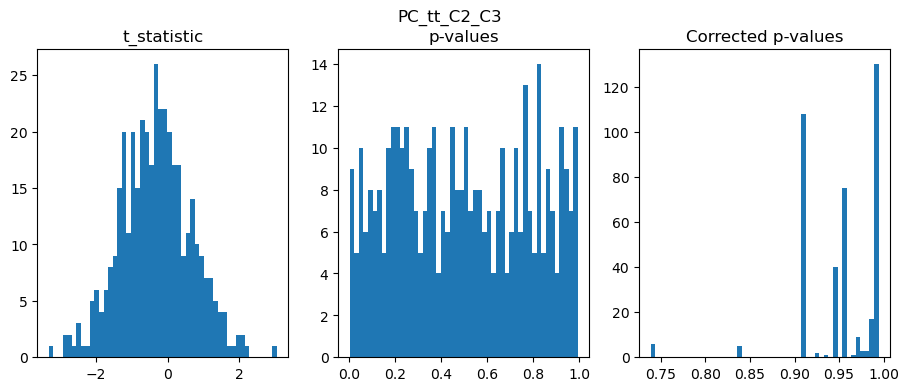

In [23]:
plot_stats(PC_tt_C2_C3, "PC_tt_C2_C3")

### PC (C2 - C4) (low interference, hard search - high interference, hard search)

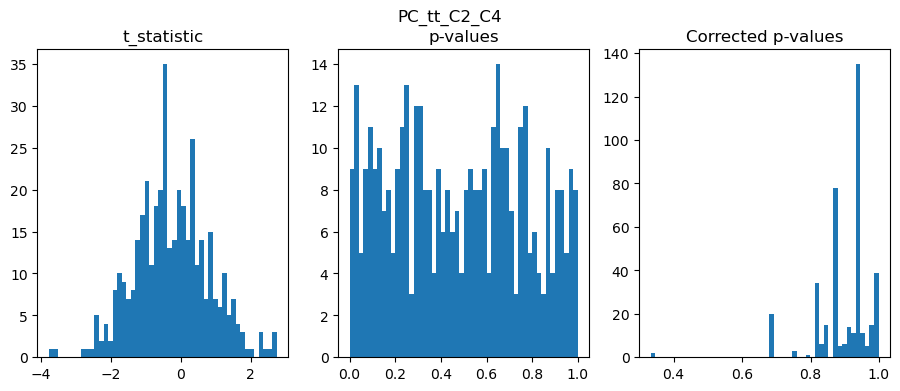

In [24]:
plot_stats(PC_tt_C2_C4, "PC_tt_C2_C4")

### PC (C3 - C4) (high interference, easy search - high interference, hard search)

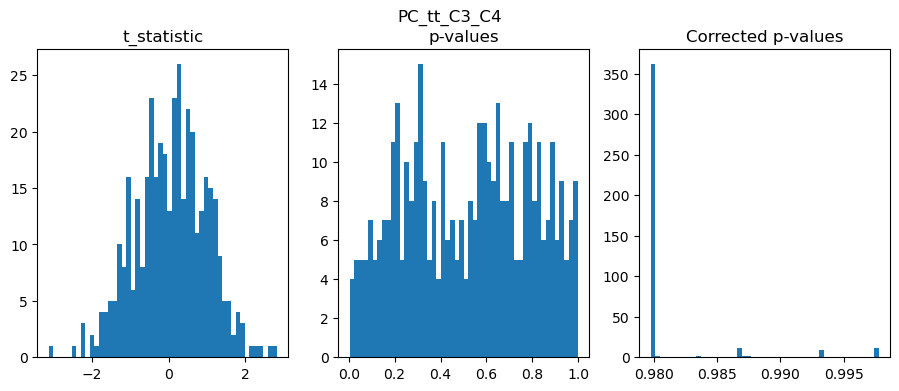

In [25]:
plot_stats(PC_tt_C3_C4, "PC_tt_C3_C4")

### WCS (C1 - C2) (low interference, easy search - low interference, hard search)

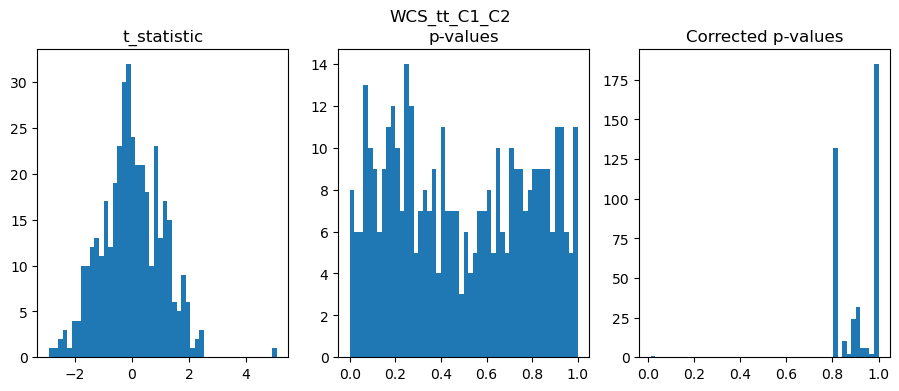

In [26]:
plot_stats(WCS_tt_C1_C2, "WCS_tt_C1_C2")

### WCS (C1 - C3) (low interference, easy search - high interference, easy search)

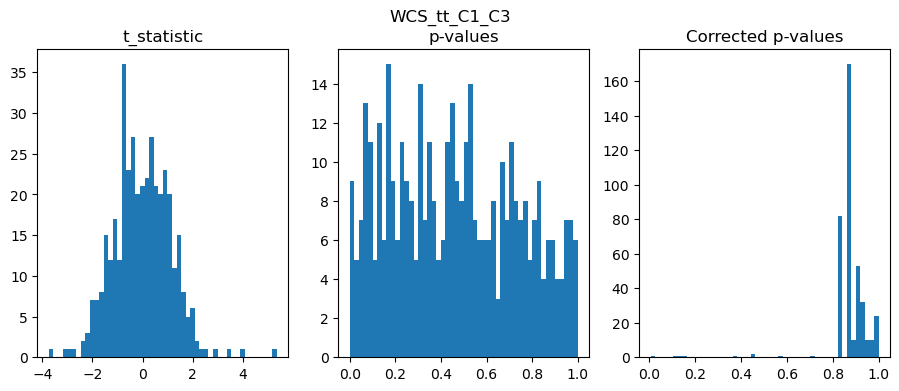

In [27]:
plot_stats(WCS_tt_C1_C3, "WCS_tt_C1_C3")

### WCS (C1 - C4) (low interference, easy search - high interference, hard search)


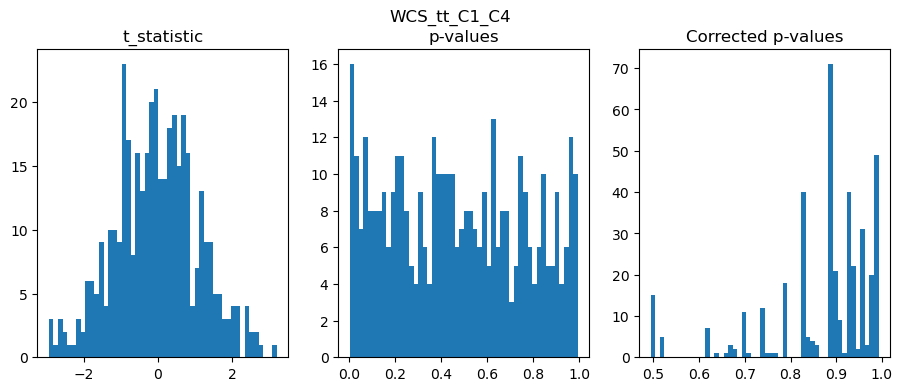

In [28]:
plot_stats(WCS_tt_C1_C4, "WCS_tt_C1_C4")

### WCS (C2 - C3) (low interference, hard search - high interference, easy search)

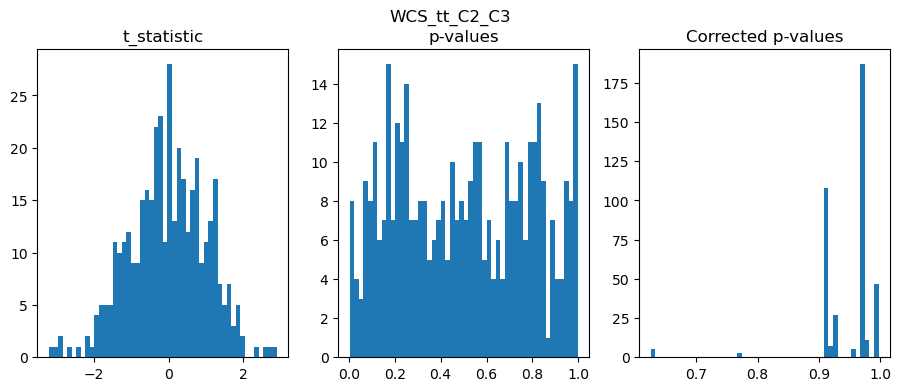

In [29]:
plot_stats(WCS_tt_C2_C3, "WCS_tt_C2_C3")

### WCS (C2 - C4) (low interference, hard search - high interference, hard search)

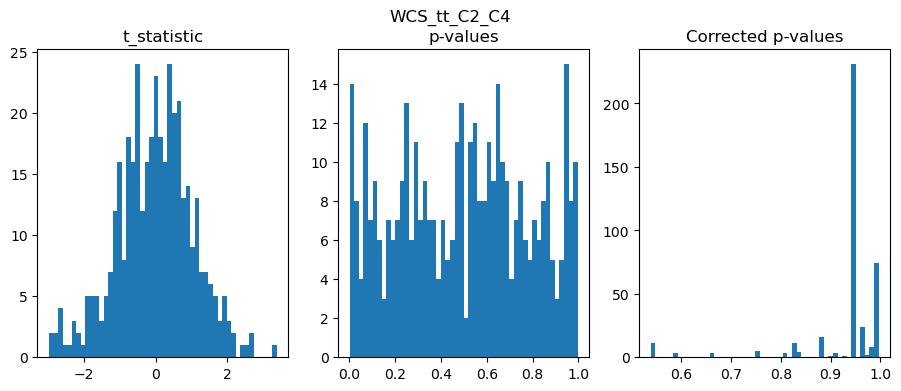

In [30]:
plot_stats(WCS_tt_C2_C4, "WCS_tt_C2_C4")

### WCS (C3 - C4) (high interference, easy search - high interference, hard search)

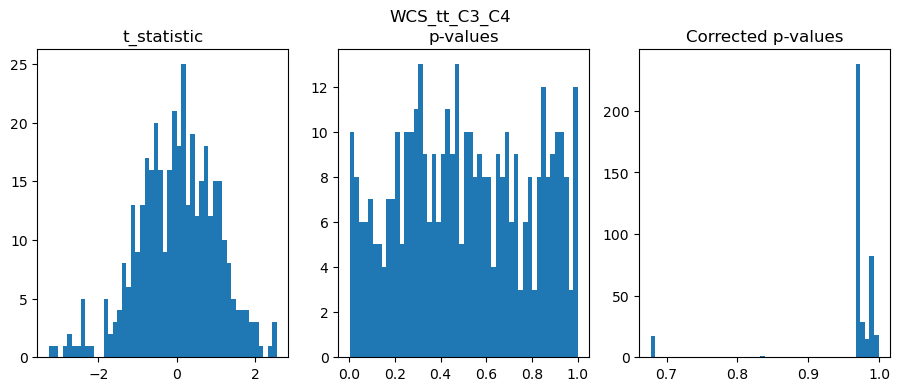

In [31]:
plot_stats(WCS_tt_C3_C4, "WCS_tt_C3_C4")

## Get coordinates from each node

In [32]:
# Get Schatlas info
# Get parcellation atlas from nilearn
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2)

# Visualize parcellation atlas
atlas_maps = atlas_file.maps

# Get coordinates and labels
# This coordinates work for (B1, B2, B3, white) surfaces
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_maps, return_label_names=False)
print("coordinates shape: " + str(coordinates.shape))

coordinates_left = coordinates[0:200, :]
coordinates_right = coordinates[200:400, :]
print("coordinates_left shape: " + str(coordinates_left.shape))
print("coordinates_right shape: " + str(coordinates_right.shape))

B3_coords_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
B3_coords_df.head()

coordinates shape: (400, 3)
coordinates_left shape: (200, 3)
coordinates_right shape: (200, 3)


,x,y,z
0,-35.365696,-62.032362,-17.055016
1,-23.350588,-72.696471,-10.296471
2,-36.414566,-81.389356,-15.966387
3,-16.950000,-86.387500,-14.987500
4,-24.406780,-96.745763,-11.924670


In [33]:
# Edit coords 
fixed_coords_left = coordinates[0:200]
fixed_coords_left[0:200, 0] = fixed_coords_left[0:200, 0] + 5

fixed_coords_right = coordinates[200:400]
fixed_coords_right[0:200, 0] = fixed_coords_right[0:200, 0] - 5

print(fixed_coords_left.shape)

(200, 3)


## Create Function to remove background and save images


In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def SaveImg_RemoveBackground(scene, name2save):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    pil_img.save(str(name2save), "PNG")
    
    return pil_img
    
def RemoveBackground(scene):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    
    return pil_img


## Brain-plots

### Brain-plot PC t-statistics (C1 - C2) (low interference, easy search - low interference, hard search)

In [35]:
# Create Scene 
SC_tt_PC_C1_C2_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C1_C2_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


In [36]:
#b_obj = BrainObj('B3', hemisphere="both", translucent=False)

def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    norm_arr = np.array(norm_arr)
    return norm_arr

def add_B3_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    s_obj = SourceObj('SourceExample', coords, **kwargs) #color=colors,
    
    # Add color to nodes
    # Just for coloring purposes normalize data
    
    normal_array = normalize(data, 0, 1)
    
    s_obj.color_sources(data=normal_array, cmap="viridis")

    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) #vertices=alt_vertices
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True )
   
    

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


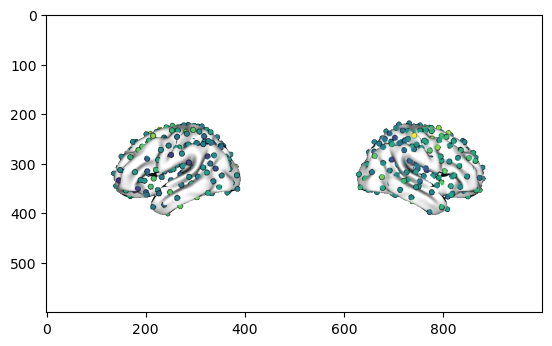

In [37]:
add_B3_to_scene(scene=SC_tt_PC_C1_C2_outer, data=PC_tt_C1_C2["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C2_outer, data=PC_tt_C1_C2["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c1_minus_c2_outer = RemoveBackground(SC_tt_PC_C1_C2_outer)
plt.imshow(sc_pc_c1_minus_c2_outer)
plt.show()


SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


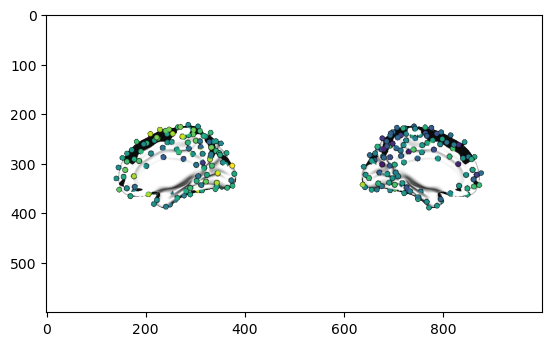

In [38]:
add_B3_to_scene(scene=SC_tt_PC_C1_C2_inner, data=PC_tt_C1_C2["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C2_inner, data=PC_tt_C1_C2["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c2_inner = RemoveBackground(SC_tt_PC_C1_C2_inner)
plt.imshow(sc_pc_c1_minus_c2_inner)
plt.show()

### Brain-plot PC t-statistics (C1 - C3) (low interference, easy search - high interference, easy search)

In [39]:
# Create Scene 
SC_tt_PC_C1_C3_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C1_C3_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


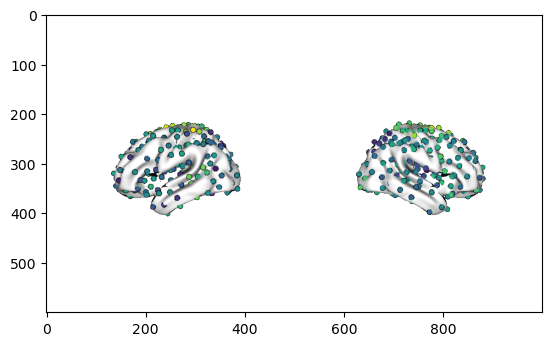

In [40]:
add_B3_to_scene(scene=SC_tt_PC_C1_C3_outer, data=PC_tt_C1_C3["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C3_outer, data=PC_tt_C1_C3["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c1_minus_c3_outer = RemoveBackground(SC_tt_PC_C1_C3_outer)
plt.imshow(sc_pc_c1_minus_c3_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


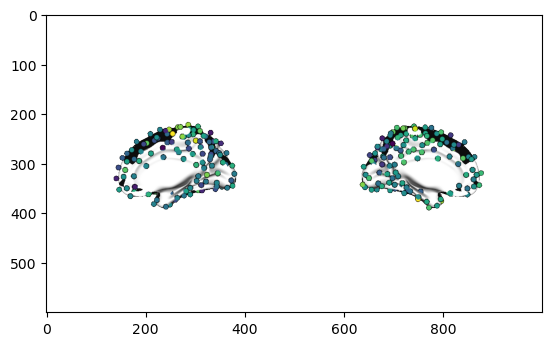

In [41]:
add_B3_to_scene(scene=SC_tt_PC_C1_C3_inner, data=PC_tt_C1_C3["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C3_inner, data=PC_tt_C1_C3["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c3_inner = RemoveBackground(SC_tt_PC_C1_C3_inner)
plt.imshow(sc_pc_c1_minus_c3_inner)
plt.show()


### Brain-plot PC t-statistics (C1 - C4) (low interference, easy search - high interference, hard search)


In [42]:
# Create Scene 
SC_tt_PC_C1_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C1_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


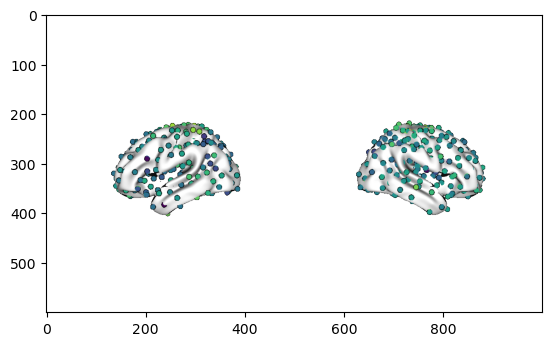

In [43]:
add_B3_to_scene(scene=SC_tt_PC_C1_C4_outer, data=PC_tt_C1_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C4_outer, data=PC_tt_C1_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c1_minus_c4_outer = RemoveBackground(SC_tt_PC_C1_C4_outer)
plt.imshow(sc_pc_c1_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


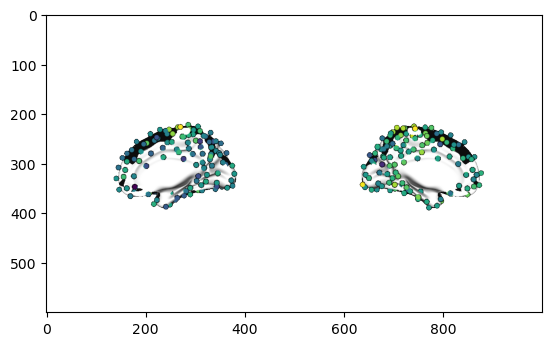

In [44]:
add_B3_to_scene(scene=SC_tt_PC_C1_C4_inner, data=PC_tt_C1_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C4_inner, data=PC_tt_C1_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c4_inner = RemoveBackground(SC_tt_PC_C1_C4_inner)
plt.imshow(sc_pc_c1_minus_c4_inner)
plt.show()


### Brain-plot PC t-statistics (C2 - C3) (low interference, hard search - high interference, easy search)

In [45]:
# Create Scene 
SC_tt_PC_C2_C3_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C2_C3_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


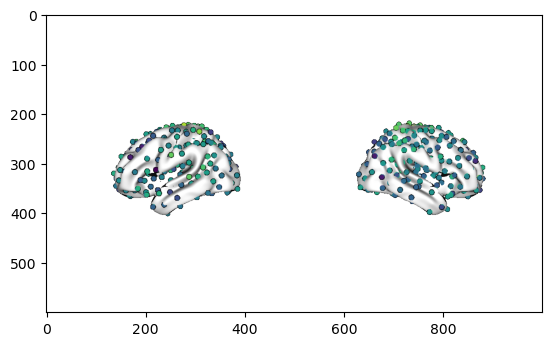

In [46]:
add_B3_to_scene(scene=SC_tt_PC_C2_C3_outer, data=PC_tt_C2_C3["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C2_C3_outer, data=PC_tt_C2_C3["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c2_minus_c3_outer = RemoveBackground(SC_tt_PC_C2_C3_outer)
plt.imshow(sc_pc_c2_minus_c3_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


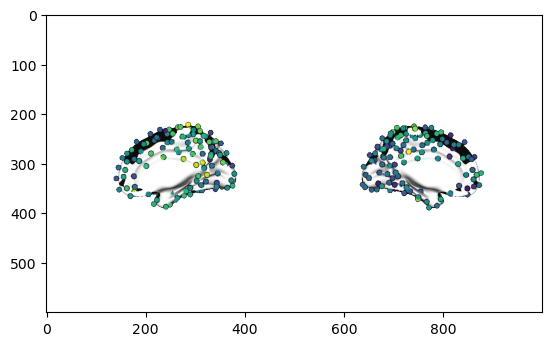

In [47]:
add_B3_to_scene(scene=SC_tt_PC_C2_C3_inner, data=PC_tt_C2_C3["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C2_C3_inner, data=PC_tt_C2_C3["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c2_minus_c3_inner = RemoveBackground(SC_tt_PC_C2_C3_inner)
plt.imshow(sc_pc_c2_minus_c3_inner)
plt.show()


### Brain-plot PC t-statistics (C2 - C4) (low interference, hard search - high interference, hard search)

In [48]:
# Create Scene 
SC_tt_PC_C2_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C2_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


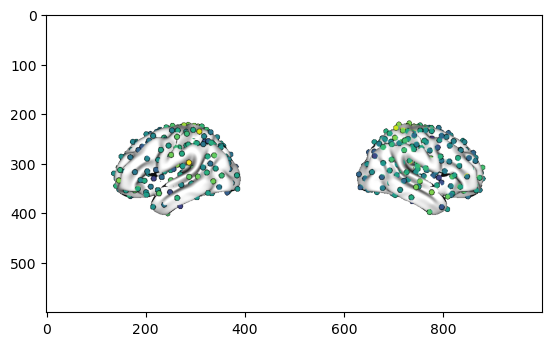

In [49]:
add_B3_to_scene(scene=SC_tt_PC_C2_C4_outer, data=PC_tt_C2_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C2_C4_outer, data=PC_tt_C2_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c2_minus_c4_outer = RemoveBackground(SC_tt_PC_C2_C4_outer)
plt.imshow(sc_pc_c2_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


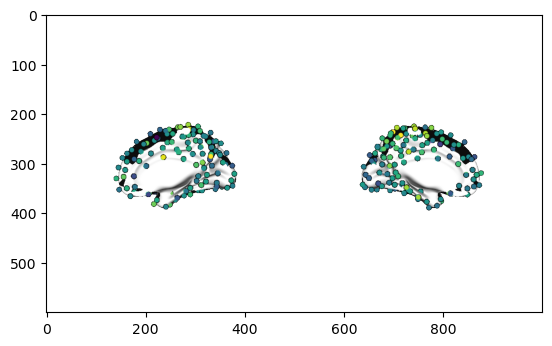

In [50]:
add_B3_to_scene(scene=SC_tt_PC_C2_C4_inner, data=PC_tt_C2_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C2_C4_inner, data=PC_tt_C2_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c2_minus_c4_inner = RemoveBackground(SC_tt_PC_C2_C4_inner)
plt.imshow(sc_pc_c2_minus_c4_inner)
plt.show()


### Brain-plot PC t-statistics (C3 - C4) (high interference, easy search - high interference, hard search)

In [51]:
# Create Scene 
SC_tt_PC_C3_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C3_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


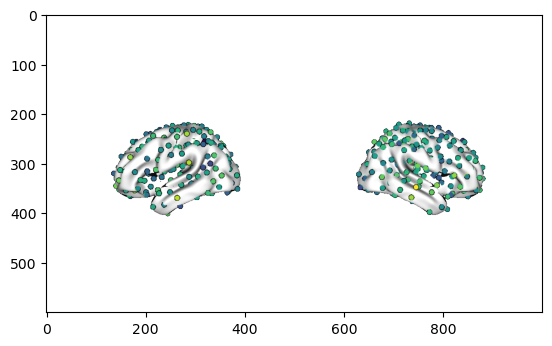

In [52]:
add_B3_to_scene(scene=SC_tt_PC_C3_C4_outer, data=PC_tt_C3_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C3_C4_outer, data=PC_tt_C3_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c3_minus_c4_outer = RemoveBackground(SC_tt_PC_C3_C4_outer)
plt.imshow(sc_pc_c3_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


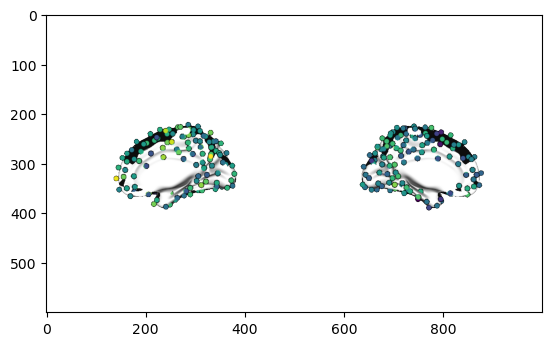

In [53]:
add_B3_to_scene(scene=SC_tt_PC_C3_C4_inner, data=PC_tt_C3_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C3_C4_inner, data=PC_tt_C3_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c3_minus_c4_inner = RemoveBackground(SC_tt_PC_C3_C4_inner)
plt.imshow(sc_pc_c3_minus_c4_inner)
plt.show()


### Brain-plot WCS t-statistics (C1 - C2) (low interference, easy search - low interference, hard search)

In [54]:
# Create Scene 
SC_tt_WCS_C1_C2_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C1_C2_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


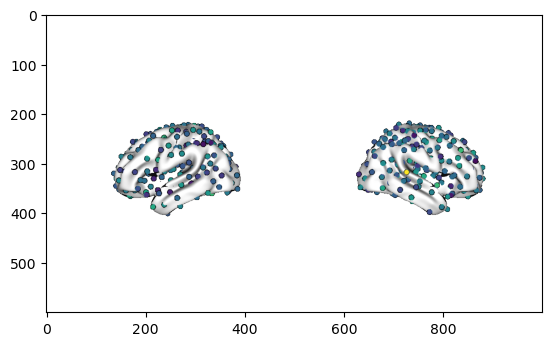

In [55]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C2_outer, data=WCS_tt_C1_C2["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C2_outer, data=WCS_tt_C1_C2["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c2_outer = RemoveBackground(SC_tt_WCS_C1_C2_outer)
plt.imshow(sc_wcs_c1_minus_c2_outer)
plt.show()


SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


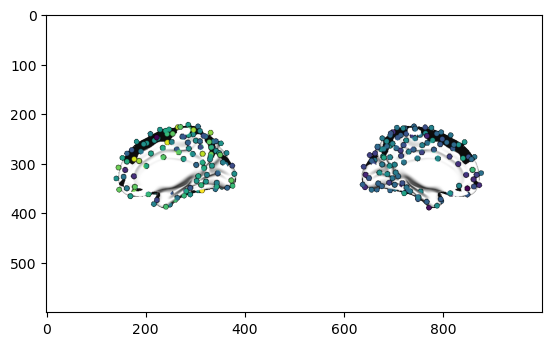

In [56]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C2_inner, data=WCS_tt_C1_C2["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C2_inner, data=WCS_tt_C1_C2["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c2_inner = RemoveBackground(SC_tt_WCS_C1_C2_inner)
plt.imshow(sc_wcs_c1_minus_c2_inner)
plt.show()

### Brain-plot WCS t-statistics (C1 - C3) (low interference, easy search - high interference, easy search)

In [57]:
# Create Scene 
SC_tt_WCS_C1_C3_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C1_C3_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


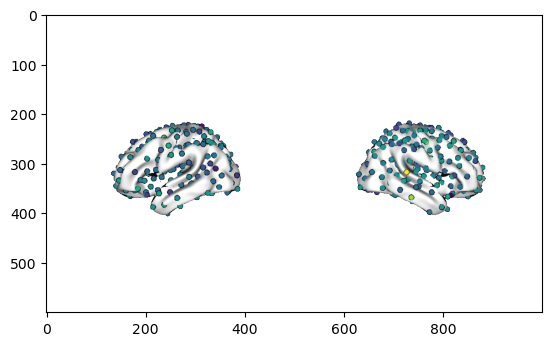

In [58]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C3_outer, data=WCS_tt_C1_C3["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C3_outer, data=WCS_tt_C1_C3["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c3_outer = RemoveBackground(SC_tt_WCS_C1_C3_outer)
plt.imshow(sc_wcs_c1_minus_c3_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


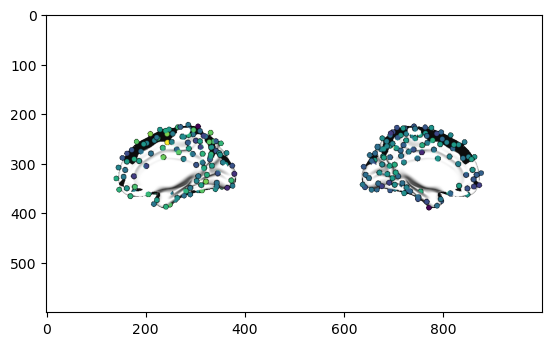

In [59]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C3_inner, data=WCS_tt_C1_C3["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C3_inner, data=WCS_tt_C1_C3["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c3_inner = RemoveBackground(SC_tt_WCS_C1_C3_inner)
plt.imshow(sc_wcs_c1_minus_c3_inner)
plt.show()

### Brain-plot WCS t-statistics (C1 - C4) (low interference, easy search - high interference, hard search)

In [60]:
# Create Scene 
SC_tt_WCS_C1_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C1_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


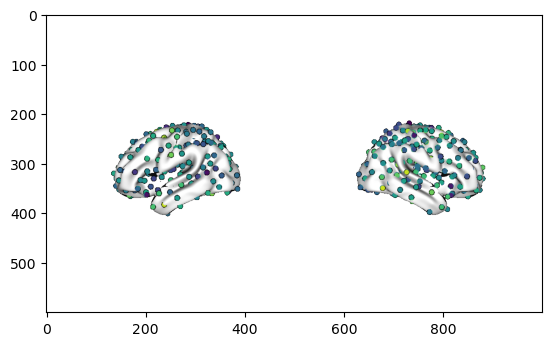

In [61]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C4_outer, data=WCS_tt_C1_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C4_outer, data=WCS_tt_C1_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c4_outer = RemoveBackground(SC_tt_WCS_C1_C4_outer)
plt.imshow(sc_wcs_c1_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


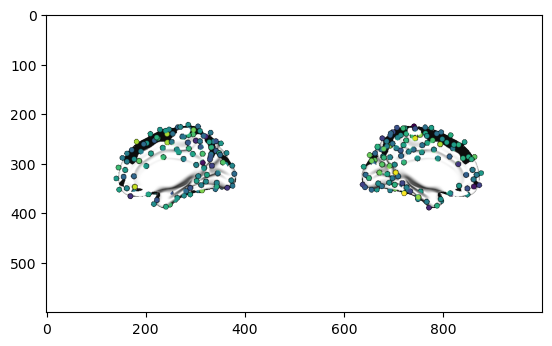

In [62]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C4_inner, data=WCS_tt_C1_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C4_inner, data=WCS_tt_C1_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c4_inner = RemoveBackground(SC_tt_WCS_C1_C4_inner)
plt.imshow(sc_wcs_c1_minus_c4_inner)
plt.show()

### Brain-plot WCS t-statistics (C2 - C3) (low interference, hard search - high interference, easy search)

In [63]:
# Create Scene 
SC_tt_WCS_C2_C3_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C2_C3_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


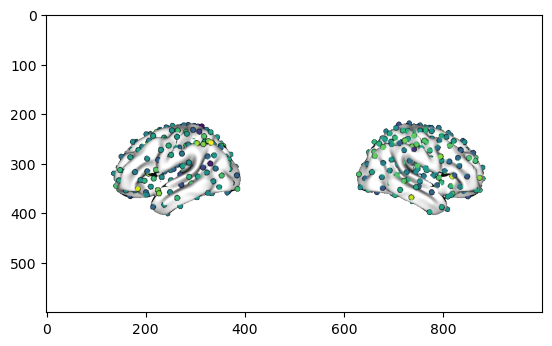

In [64]:
add_B3_to_scene(scene=SC_tt_WCS_C2_C3_outer, data=WCS_tt_C2_C3["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C2_C3_outer, data=WCS_tt_C2_C3["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c2_minus_c3_outer = RemoveBackground(SC_tt_WCS_C2_C3_outer)
plt.imshow(sc_wcs_c2_minus_c3_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


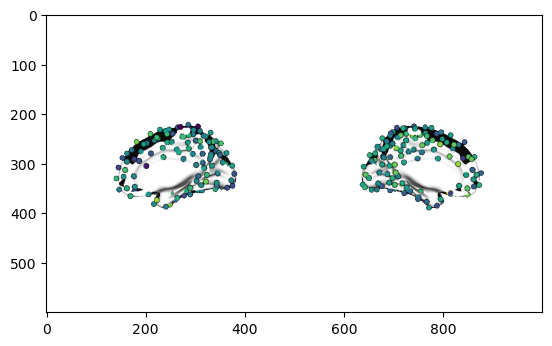

In [65]:
add_B3_to_scene(scene=SC_tt_WCS_C2_C3_inner, data=WCS_tt_C2_C3["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C2_C3_inner, data=WCS_tt_C2_C3["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c2_minus_c3_inner = RemoveBackground(SC_tt_WCS_C2_C3_inner)
plt.imshow(sc_wcs_c2_minus_c3_inner)
plt.show()

### Brain-plot WCS t-statistics (C2 - C4) (low interference, hard search - high interference, hard search)

In [66]:
# Create Scene 
SC_tt_WCS_C2_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C2_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


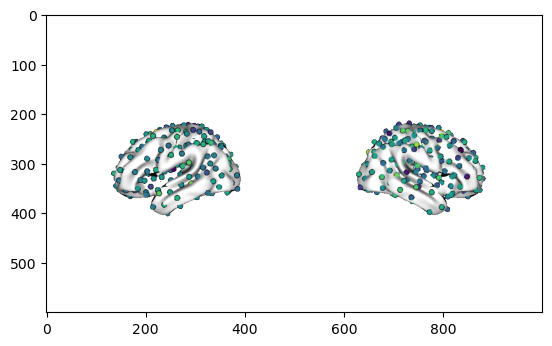

In [67]:
add_B3_to_scene(scene=SC_tt_WCS_C2_C4_outer, data=WCS_tt_C2_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C2_C4_outer, data=WCS_tt_C2_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c2_minus_c4_outer = RemoveBackground(SC_tt_WCS_C2_C4_outer)
plt.imshow(sc_wcs_c2_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


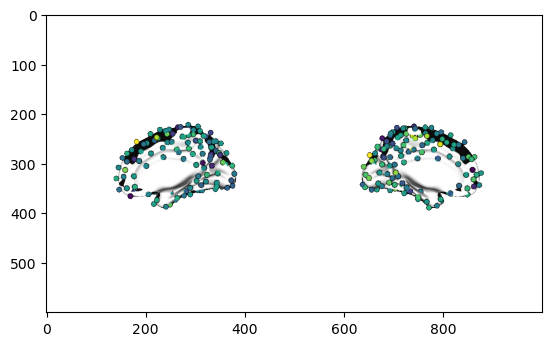

In [68]:
add_B3_to_scene(scene=SC_tt_WCS_C2_C4_inner, data=WCS_tt_C2_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C2_C4_inner, data=WCS_tt_C2_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c2_minus_c4_inner = RemoveBackground(SC_tt_WCS_C2_C4_inner)
plt.imshow(sc_wcs_c2_minus_c4_inner)
plt.show()

### Brain-plot WCS t-statistics (C3 - C4) (high interference, easy search - high interference, hard search)

In [69]:
# Create Scene 
SC_tt_WCS_C3_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C3_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


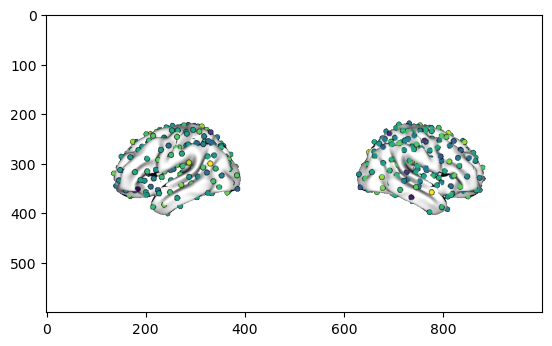

In [70]:
add_B3_to_scene(scene=SC_tt_WCS_C3_C4_outer, data=WCS_tt_C3_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C3_C4_outer, data=WCS_tt_C3_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c3_minus_c4_outer = RemoveBackground(SC_tt_WCS_C3_C4_outer)
plt.imshow(sc_wcs_c3_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


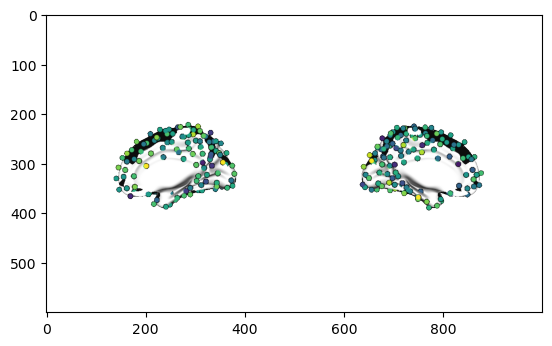

In [71]:
add_B3_to_scene(scene=SC_tt_WCS_C3_C4_inner, data=WCS_tt_C3_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C3_C4_inner, data=WCS_tt_C3_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c3_minus_c4_inner = RemoveBackground(SC_tt_WCS_C3_C4_inner)
plt.imshow(sc_wcs_c3_minus_c4_inner)
plt.show()

In [72]:
"""
Checked whether data is normally distributed. It is. 

#norm_1_s, norm_1_p = normaltest(c1_pc_df[0, :], nan_policy="omit")
#print(norm_1_s)
#print(norm_1_p)

"""

'\nChecked whether data is normally distributed. It is. \n\n#norm_1_s, norm_1_p = normaltest(c1_pc_df[0, :], nan_policy="omit")\n#print(norm_1_s)\n#print(norm_1_p)\n\n'

In [73]:
"""
Notes: 
<br>
"The participation coefficient of a node is therefore close to 1 if its links are
uniformly distributed among all the modules and 0 if all its links are within its own
module. (Guimerà R, Nunes Amaral LA (2005) Functional cartography of complex metabolic
networks. Nature)"
<br>
When calculating difference in PC between conditions what to do with negative scores?
## Questions 
<br>
1) 
<br>
2) Normalize t-statistic for brain plots. Does it matter? 
"""

'\nNotes: \n<br>\n"The participation coefficient of a node is therefore close to 1 if its links are\nuniformly distributed among all the modules and 0 if all its links are within its own\nmodule. (Guimerà R, Nunes Amaral LA (2005) Functional cartography of complex metabolic\nnetworks. Nature)"\n<br>\nWhen calculating difference in PC between conditions what to do with negative scores?\n## Questions \n<br>\n1) \n<br>\n2) Normalize t-statistic for brain plots. Does it matter? \n'

In [74]:
"""
pc_c1_minus_c2 = np.array(c1_total_pc_mean - c2_total_pc_mean)
pc_c1_minus_c3 = np.array(c1_total_pc_mean - c3_total_pc_mean)
pc_c1_minus_c4 = np.array(c1_total_pc_mean - c4_total_pc_mean)
pc_c2_minus_c3 = np.array(c2_total_pc_mean - c3_total_pc_mean)
pc_c2_minus_c4 = np.array(c2_total_pc_mean - c4_total_pc_mean)
pc_c3_minus_c4 = np.array(c3_total_pc_mean - c4_total_pc_mean)

print("pc_c1_minus_c2 shape: " + str(pc_c1_minus_c2.shape))
print("pc_c1_minus_c3 shape: " + str(pc_c1_minus_c3.shape))
print("pc_c1_minus_c4 shape: " + str(pc_c1_minus_c4.shape))
print("pc_c2_minus_c3 shape: " + str(pc_c2_minus_c3.shape))
print("pc_c2_minus_c4 shape: " + str(pc_c2_minus_c4.shape))
print("pc_c3_minus_c4 shape: " + str(pc_c3_minus_c4.shape))

wcs_c1_minus_c2 = np.array(c1_total_wcs_mean - c2_total_wcs_mean)
wcs_c1_minus_c3 = np.array(c1_total_wcs_mean - c3_total_wcs_mean)
wcs_c1_minus_c4 = np.array(c1_total_wcs_mean - c4_total_wcs_mean)
wcs_c2_minus_c3 = np.array(c2_total_wcs_mean - c3_total_wcs_mean)
wcs_c2_minus_c4 = np.array(c2_total_wcs_mean - c4_total_wcs_mean)
wcs_c3_minus_c4 = np.array(c3_total_wcs_mean - c4_total_wcs_mean)

print("wcs_c1_minus_c2 shape: " + str(wcs_c1_minus_c2.shape))
print("wcs_c1_minus_c3 shape: " + str(wcs_c1_minus_c3.shape))
print("wcs_c1_minus_c4 shape: " + str(wcs_c1_minus_c4.shape))
print("wcs_c2_minus_c3 shape: " + str(wcs_c2_minus_c3.shape))
print("wcs_c2_minus_c4 shape: " + str(wcs_c2_minus_c4.shape))
print("wcs_c3_minus_c4 shape: " + str(wcs_c3_minus_c4.shape))

#arr = np.load("DistractWM/sub-121/graph_metrics/pc_cond1_space.npy")
#arr[0, :]

"""


'\npc_c1_minus_c2 = np.array(c1_total_pc_mean - c2_total_pc_mean)\npc_c1_minus_c3 = np.array(c1_total_pc_mean - c3_total_pc_mean)\npc_c1_minus_c4 = np.array(c1_total_pc_mean - c4_total_pc_mean)\npc_c2_minus_c3 = np.array(c2_total_pc_mean - c3_total_pc_mean)\npc_c2_minus_c4 = np.array(c2_total_pc_mean - c4_total_pc_mean)\npc_c3_minus_c4 = np.array(c3_total_pc_mean - c4_total_pc_mean)\n\nprint("pc_c1_minus_c2 shape: " + str(pc_c1_minus_c2.shape))\nprint("pc_c1_minus_c3 shape: " + str(pc_c1_minus_c3.shape))\nprint("pc_c1_minus_c4 shape: " + str(pc_c1_minus_c4.shape))\nprint("pc_c2_minus_c3 shape: " + str(pc_c2_minus_c3.shape))\nprint("pc_c2_minus_c4 shape: " + str(pc_c2_minus_c4.shape))\nprint("pc_c3_minus_c4 shape: " + str(pc_c3_minus_c4.shape))\n\nwcs_c1_minus_c2 = np.array(c1_total_wcs_mean - c2_total_wcs_mean)\nwcs_c1_minus_c3 = np.array(c1_total_wcs_mean - c3_total_wcs_mean)\nwcs_c1_minus_c4 = np.array(c1_total_wcs_mean - c4_total_wcs_mean)\nwcs_c2_minus_c3 = np.array(c2_total_wcs_me